In [4]:
import numpy as np
import pandas as pd

### Read data

In [20]:
train_data = pd.read_csv("train.csv", index_col=['Loan_ID'])
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [21]:
test_data = pd.read_csv("test.csv", index_col=['Loan_ID'] )
test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban


### Re-shaping the data

In [85]:
# loan_status = train_data['Loan_Status']
# loan_status

In [26]:
train_data_raw = train_data.drop(['Loan_Status'], axis=1)
train_data_raw

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban


In [29]:
numeric_loan_status = train_data.replace({"Loan_Status": {"Y": 1, "N": 0}})
numeric_loan_status

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1


In [86]:
loan_status = numeric_loan_status['Loan_Status']
loan_status

Loan_ID
LP001002    1
LP001003    0
LP001005    1
LP001006    1
LP001008    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    0
Name: Loan_Status, Length: 614, dtype: int64

### Data Visualisations

<Axes: xlabel='Gender,Married'>

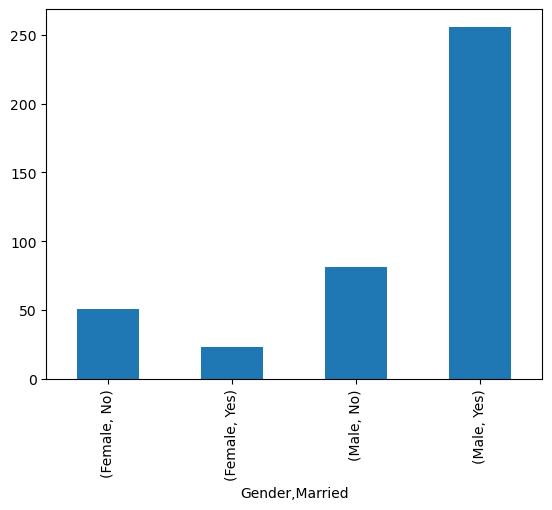

In [39]:
numeric_loan_status.groupby(['Gender', 'Married']).Loan_Status.sum().plot(kind='bar')

<Axes: xlabel='Gender'>

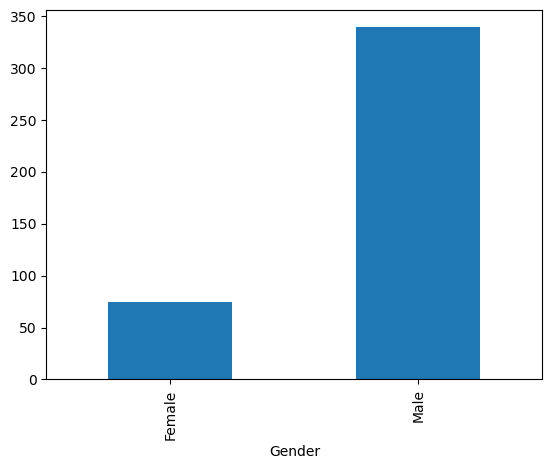

In [33]:
numeric_loan_status.groupby(['Gender']).Loan_Status.sum().plot(kind='bar')

<Axes: xlabel='Married'>

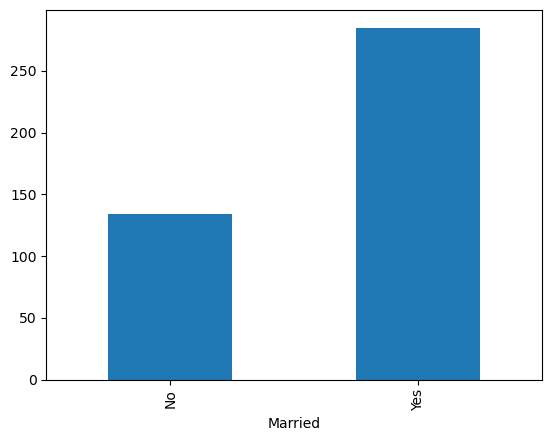

In [40]:
numeric_loan_status.groupby(['Married']).Loan_Status.sum().plot(kind='bar')

<Axes: xlabel='Dependents'>

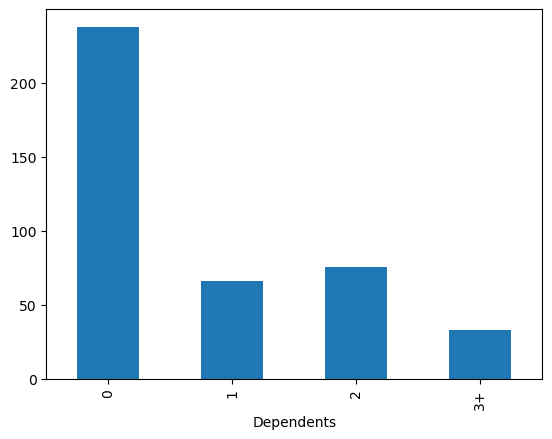

In [41]:
numeric_loan_status.groupby(['Dependents']).Loan_Status.sum().plot(kind='bar')

<Axes: xlabel='Self_Employed'>

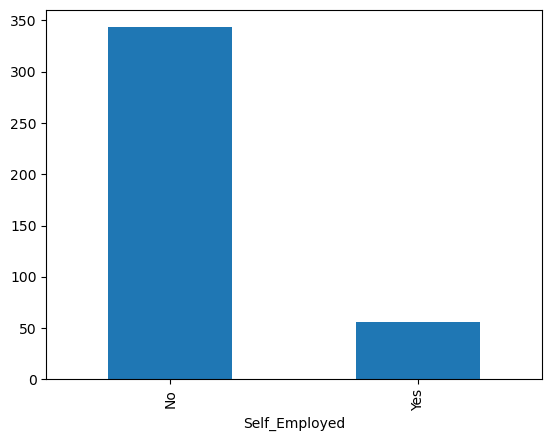

In [42]:
numeric_loan_status.groupby(['Self_Employed']).Loan_Status.sum().plot(kind='bar')

<Axes: xlabel='Credit_History'>

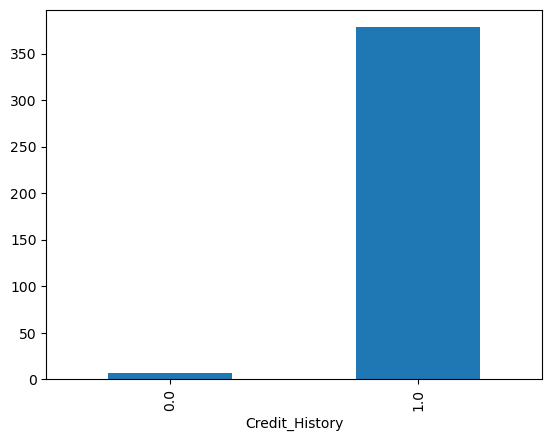

In [43]:
numeric_loan_status.groupby(['Credit_History']).Loan_Status.sum().plot(kind='bar')

<Axes: xlabel='Property_Area'>

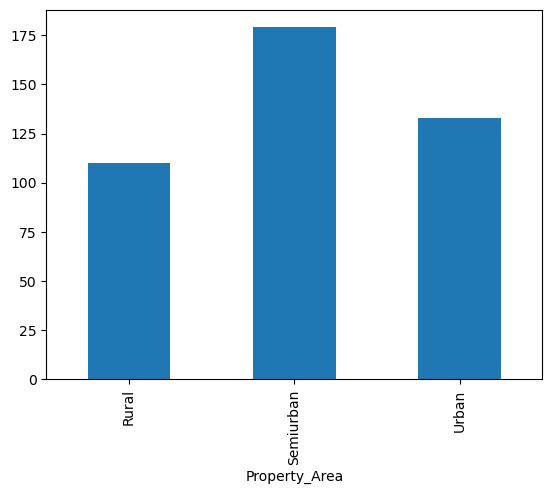

In [44]:
numeric_loan_status.groupby(['Property_Area']).Loan_Status.sum().plot(kind='bar')

<Axes: xlabel='Property_Area,Credit_History,Self_Employed'>

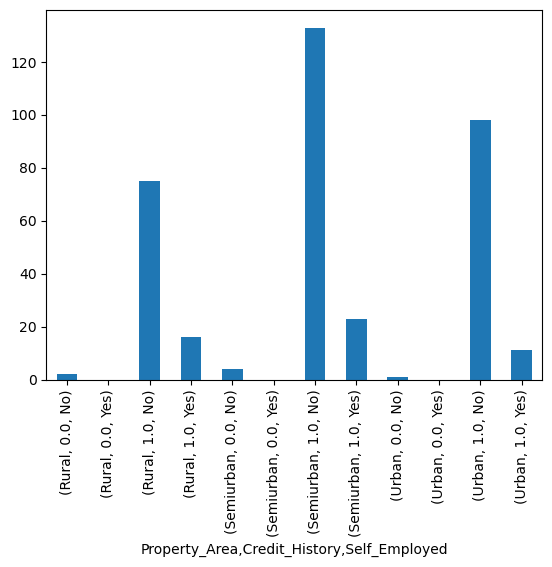

In [49]:
numeric_loan_status.groupby(['Property_Area', 'Credit_History', 'Self_Employed']).Loan_Status.sum().plot(kind='bar')

<Axes: xlabel='Loan_Amount_Term'>

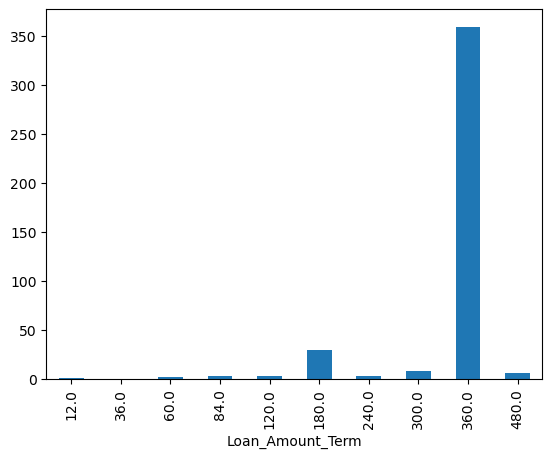

In [52]:
numeric_loan_status.groupby(['Loan_Amount_Term']).Loan_Status.sum().plot(kind='bar')

<Axes: xlabel='Loan_Amount_Term,Education'>

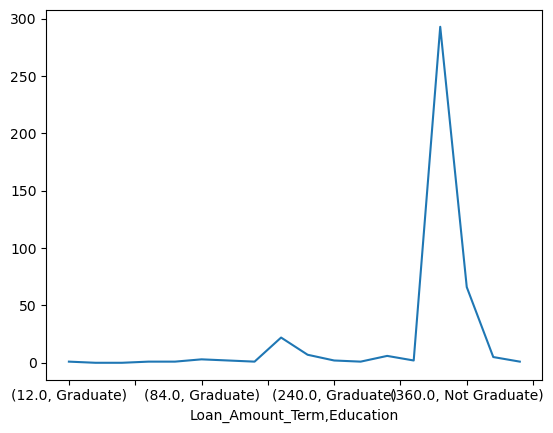

In [54]:
numeric_loan_status.groupby(['Loan_Amount_Term', 'Education']).Loan_Status.sum().plot()

In [51]:
max_loan_amount = numeric_loan_status['LoanAmount'].max()
max_loan_amount

700.0

In [69]:
# numeric_loan_status_income = train_data.mask({"ApplicantIncome": { 'y': 1, "N": 0}})
# numeric_loan_status_income

# income_mask_less_3000 = train_data['ApplicantIncome'] < 3000
# income_mask = train_data['ApplicantIncome'].mask(income_mask_less_3000, 'low')

# income_mask

In [56]:
xx = numeric_loan_status[['ApplicantIncome']]
xx.head(50)

,ApplicantIncome
Loan_ID,
LP001002,5849
LP001003,4583
LP001005,3000
LP001006,2583
LP001008,6000
LP001011,5417
LP001013,2333
LP001014,3036
LP001018,4006


### PreProcessing the data

In [73]:
# printing bhe train_data beore encoding
train_data_raw

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban


In [81]:
# one-hot-encoding- splits a column with text rows with its numeric values 
encoded_train_data = pd.get_dummies(train_data_raw)
encoded_train_data


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,,,,
LP001002,5849,0.0,NaN,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
LP001003,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
LP001005,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
LP001006,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
LP001008,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
LP002979,4106,0.0,40.0,180.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
LP002983,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1


In [83]:
# filling all nan values in lonamount with the avaerage lon amount

# avarage loan amount
average_loan_amount = encoded_train_data['LoanAmount'].mean()
# average_loan_amount - 146.41216216216216

# avarage loan amount term
average_loan_term = encoded_train_data['Loan_Amount_Term'].mean()

# avarage credit_history
average_credit_history = encoded_train_data['Credit_History'].mean()


#filling all nan values in lonamount with the avaerage lon amount
encoded_train_data['LoanAmount'].fillna(average_loan_amount, inplace=True)
encoded_train_data['Loan_Amount_Term'].fillna(average_loan_term, inplace=True)
encoded_train_data['Credit_History'].fillna(average_credit_history, inplace=True)

encoded_train_data.head(50)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,,,,
LP001002,5849,0.0,146.412162,360.0,1.000000,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
LP001003,4583,1508.0,128.000000,360.0,1.000000,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
LP001005,3000,0.0,66.000000,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
LP001006,2583,2358.0,120.000000,360.0,1.000000,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
LP001008,6000,0.0,141.000000,360.0,1.000000,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
LP001011,5417,4196.0,267.000000,360.0,1.000000,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
LP001013,2333,1516.0,95.000000,360.0,1.000000,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
LP001014,3036,2504.0,158.000000,360.0,0.000000,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
LP001018,4006,1526.0,168.000000,360.0,1.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


### Training the model

In [84]:
#imports
from sklearn.model_selection import train_test_split

In [88]:
x_train, x_test, y_train, y_test = train_test_split(encoded_train_data, loan_status, test_size=0.2, random_state=42) 

In [91]:
# importing the deciontreeclassier from sklearn
from sklearn.tree import DecisionTreeClassifier

In [6]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
approval = train_data['Loan_Status']
approval

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [8]:
train_data_raw = train_data.drop('Loan_Status', axis=1)
train_data_raw

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [10]:
numeric_loan_status = train_data.replace({"Loan_Status": {'Y': 1, 'N':0 }})
numeric_loan_status

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


<Axes: xlabel='Self_Employed'>

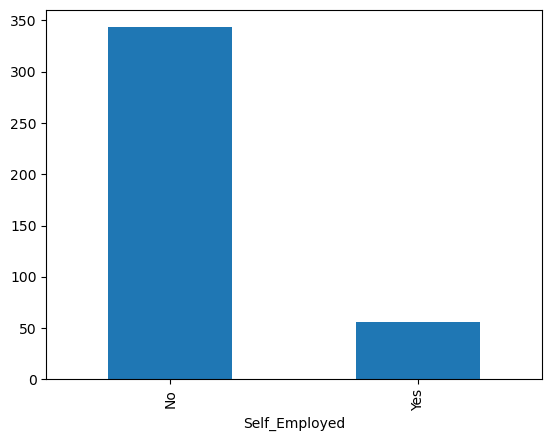

In [11]:
numeric_loan_status.groupby("Self_Employed").Loan_Status.sum().plot(kind='bar')

<Axes: xlabel='Education'>

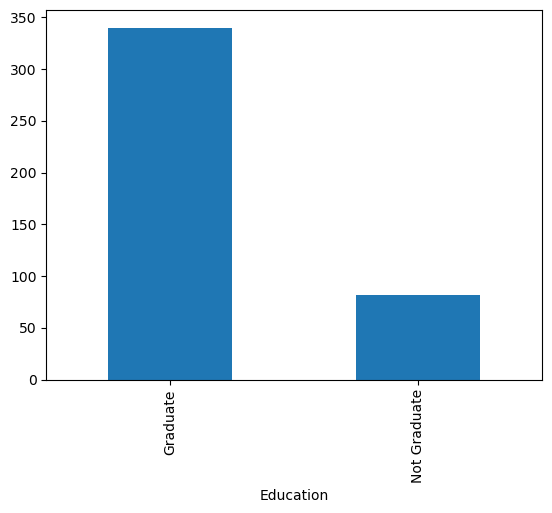

In [13]:
numeric_loan_status.groupby("Education").Loan_Status.sum().plot(kind='bar')

<Axes: xlabel='Married'>

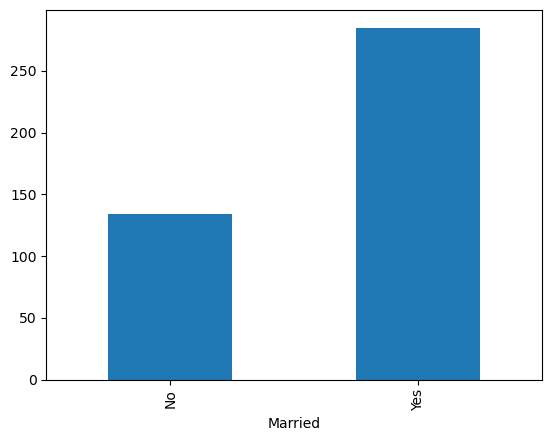

In [14]:
numeric_loan_status.groupby("Married").Loan_Status.sum().plot(kind='bar')

<Axes: xlabel='Property_Area'>

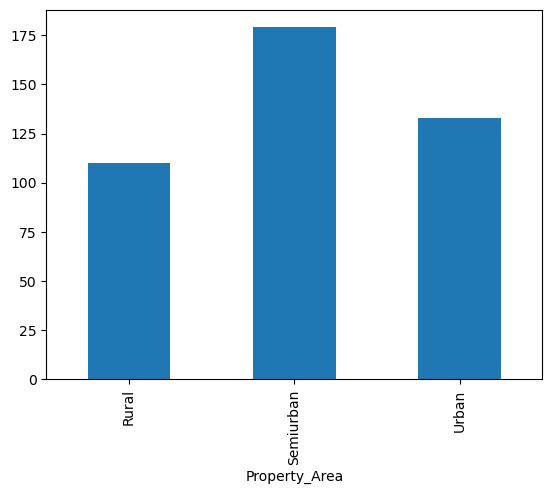

In [15]:
numeric_loan_status.groupby("Property_Area").Loan_Status.sum().plot(kind='bar')

In [18]:
max('LoanAmount', axis=1)

TypeError: 'axis' is an invalid keyword argument for max()

In [9]:
features = pd.get_dummies(train_data_raw)
features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1


In [ ]:
train_data.groupby('Self-Employed').Loan_Status.sum().plot(kind='bar')